# 1.Data pre-processing

In [1]:
import pandas as pd
data = pd.read_csv('titanic-passengers.csv',sep = ';')

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


##### As shown in the output above, we have three columns that contain missing values " Age" , "Cabin" , "Embarked". so we need to preprocess each one of them to clean our data.

In [4]:
data['Age'].isnull().sum()

177

In [5]:
data['Age']

0      28.0
1      25.0
2      20.0
3      29.0
4      31.0
       ... 
886    14.0
887    22.0
888    30.0
889     NaN
890    19.0
Name: Age, Length: 891, dtype: float64

In [6]:
data['Age'].fillna(data['Age'].mean(),inplace = True)

In [7]:
data['Age'].isnull().sum()

0

In [8]:
data['Embarked'].isnull().sum()

2

In [9]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace = True)

In [10]:
data['Embarked'].isnull().sum()

0

In [11]:
data['Cabin'].isnull().sum()

687

#### for the "cabin" culumn there are 687 NaN values over 891 values, so replacing it by the mode of the series would cause some biases so it's better to delete the whole entry.

In [12]:
data.drop('Cabin', axis = 1, inplace = True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [14]:
data.isnull().sum().sum()

0

# 2.Data visualization

In [15]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Count'>

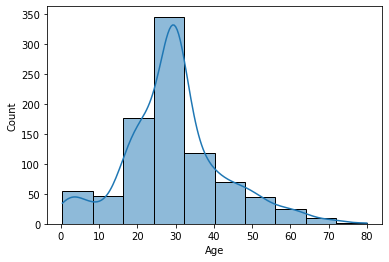

In [16]:
sns.histplot(data['Age'], bins = 10, kde = True)

#### The histogram of the col age shows that the majority of passengers are between 25 and 32 yo.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

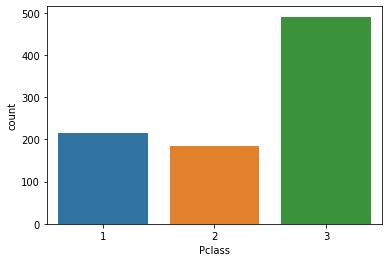

In [17]:
sns.countplot(x = 'Pclass', data = data)

#### The barplot of the col Pclass shows that the majority of the passengers are from 3rd class which means poor.

<AxesSubplot:xlabel='Sex', ylabel='count'>

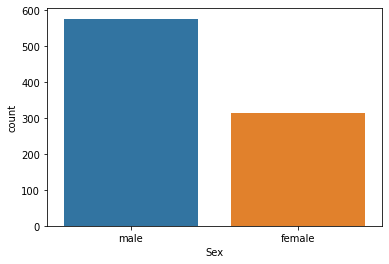

In [18]:
    sns.countplot(x = 'Sex', data = data)

In [19]:
import matplotlib as plt

#### The barplot of the col Sex shows that the males are approximately 50% more than the females.


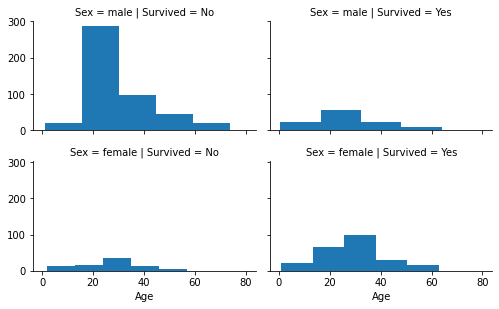

In [20]:
g = sns.FacetGrid(data, row = 'Sex', col = 'Survived', height=2.2, aspect=1.6)
g.map(plt.pyplot.hist,'Age', bins = 5)


/home/sanaa/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


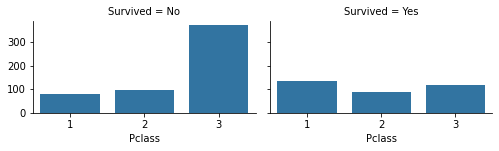

In [21]:
g = sns.FacetGrid(data,col = 'Survived', height=2.2, aspect=1.6)
g.map(sns.countplot,'Pclass')

#### Passengers from class 3 are more likey to die comparing to people in the other two classes.
#### Passengers form class 1 are more likey to survive than passengers from class 2.

/home/sanaa/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


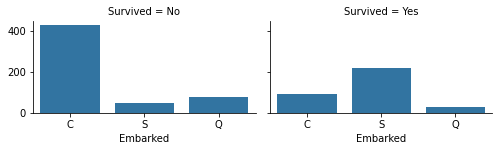

In [22]:
g = sns.FacetGrid(data,col = 'Survived', height=2.2, aspect=1.6)
g.map(sns.countplot,'Embarked')

#### Passengers who embarked from C are more likely to die while those who embarked from S are more likely to survive.

In [23]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.pyplot.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )



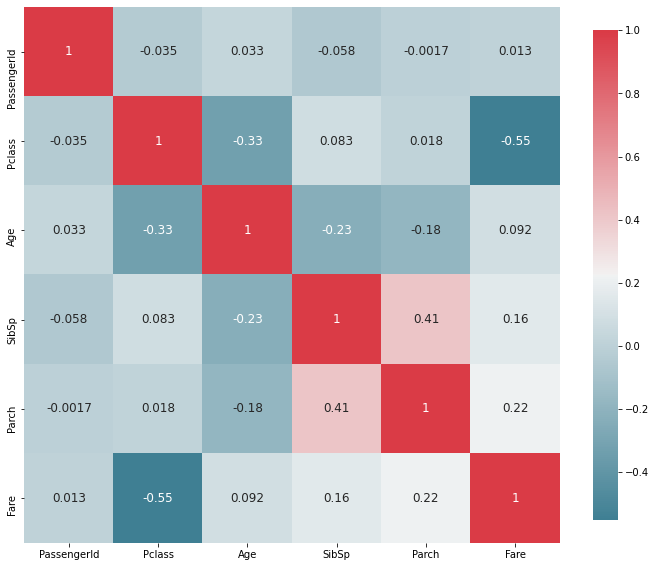

In [24]:
plot_correlation_map(data)

#### The plot_correlation_map function has too main functions : it first calculates the correlation between different features of our dataset and then plots the calculated values in a chart where both x- and y- axis are the columns' names of our dataset. The vislualization is encoded using (blue-white-red ) palette where the blue represents a correlation value of -1 , the white a correlation value of 0 and the red a correlation value of 1.
#### This function enables us to have a look at the most significant correlation coefficients and so enables us to identify the variables with a strong relationship. Here, the most significant correlation(0.41) is between the two features SibSp and Parch and the least one is between(-0.55) Fare and Pclass.

#### PS: here the function took in consideration only numerical features

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Survived'] = encoder.fit_transform(data['Survived'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])

In [26]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,2
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,0
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,0
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,2
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,2


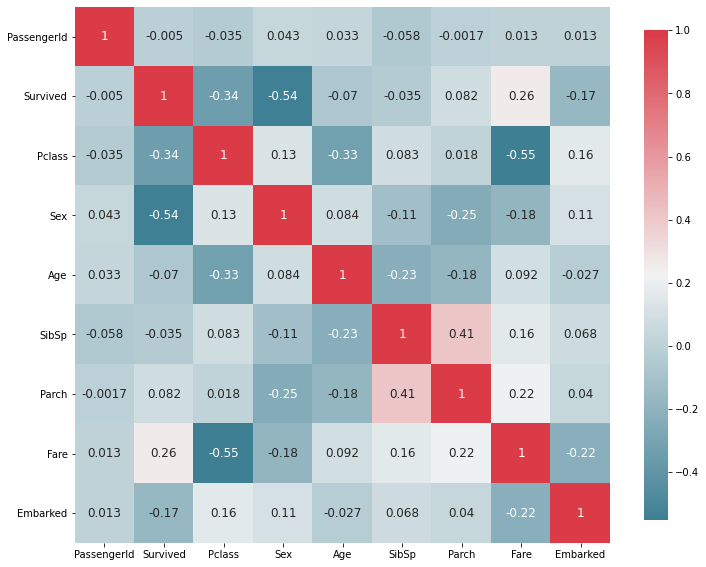

In [27]:
plot_correlation_map(data)

#### In this second version, we took all the features including the categorical ones.

In [28]:
data[["Pclass", "Survived"]].groupby(["Pclass"], as_index = True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [29]:
data = data.drop(['Ticket', 'PassengerId'], axis = 1)

#### the useless cols of the dataset are " PassengerID" and " Ticket". The name is not considered as a useless column since we will be using it later to extract more informations.

In [30]:
data['Title'] = data['Name'].map(lambda x:x.split(',')[1].strip().split('.')[0])
data = data.drop(['Name'], axis = 1)

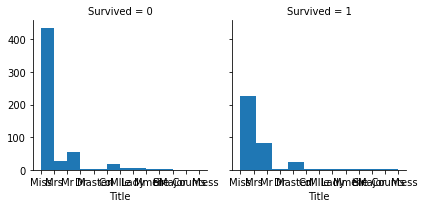

In [31]:
g = sns.FacetGrid(data, col = 'Survived')
g.map(plt.pyplot.hist,'Title')

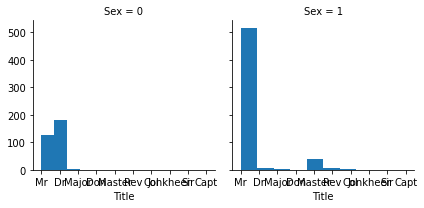

In [32]:
g = sns.FacetGrid(data, col = 'Sex')
g.map(plt.pyplot.hist,'Title')

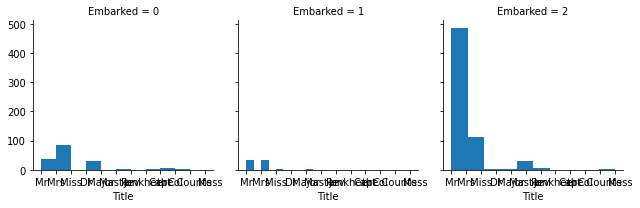

In [33]:
g = sns.FacetGrid(data, col = 'Embarked')
g.map(plt.pyplot.hist,'Title')

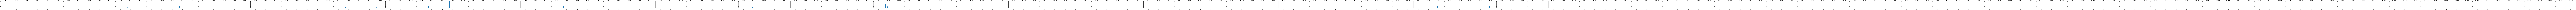

In [34]:
g = sns.FacetGrid(data, col = 'Fare')
g.map(plt.pyplot.hist,'Title')

In [35]:
Title_Dictionary = { "Capt": "Officer","Col":"Officer","Major": "Officer","Dr":"Officer","Rev" :"Officer","Jonkheer":"Royalty","Don":"Royalty",

 "Sir":"Royalty","Lady":"Royalty","the Countess":"Royalty","Dona":"Royalty","Mlle":"Miss","Miss":"Miss","Ms":"Mrs","Mr" :"Mrs","Mrs" :"Mrs",

"Master":"Master"}
cleanup = {"Title":Title_Dictionary}
data.replace(cleanup, inplace = True)

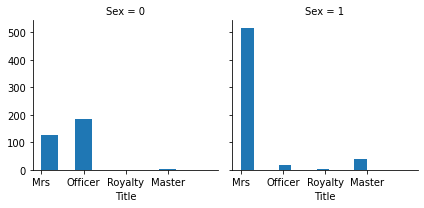

In [36]:
g = sns.FacetGrid(data, col = 'Sex')
g.map(plt.pyplot.hist,'Title')

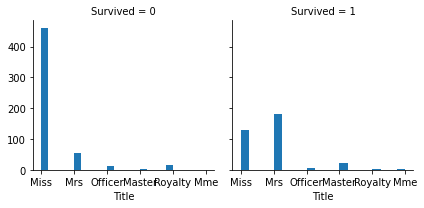

In [37]:
g = sns.FacetGrid(data, col = 'Survived')
g.map(plt.pyplot.hist,'Title' , bins = 20)

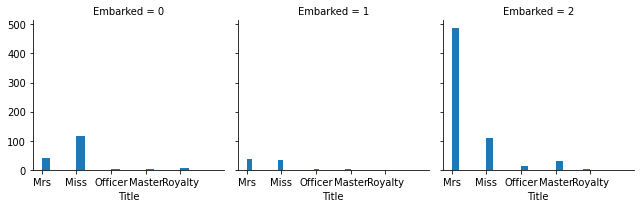

In [38]:
g = sns.FacetGrid(data, col = 'Embarked')
g.map(plt.pyplot.hist,'Title', bins = 20)

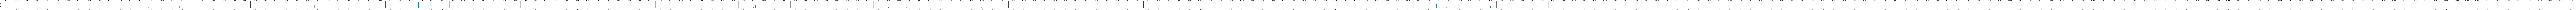

In [39]:
g = sns.FacetGrid(data, col = 'Fare')
g.map(plt.pyplot.hist,'Title')

In [40]:
data['FamilySize'] = data.apply(lambda x:x['Parch'] + x['SibSp'], axis = 1)

In [41]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,2,1,28.000000,0,0,13.0000,2,Mrs,0
1,0,3,1,25.000000,0,0,7.6500,2,Mrs,0
2,0,3,1,20.000000,0,0,7.8542,2,Mrs,0
3,0,3,0,29.000000,0,4,21.0750,2,Mrs,4
4,0,1,1,31.000000,1,0,52.0000,2,Mrs,1
...,...,...,...,...,...,...,...,...,...,...
886,1,2,0,14.000000,1,0,30.0708,0,Mrs,1
887,0,3,1,22.000000,0,0,7.2292,0,Mrs,0
888,0,3,0,30.000000,0,0,8.6625,2,Miss,0
889,0,3,1,29.699118,0,0,7.8958,2,Mrs,0


In [42]:
data['Title'] = encoder.fit_transform(data['Title'])

In [43]:
data = data.drop(['SibSp','Parch'], axis = 1)

In [44]:
data

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,2,1,28.000000,13.0000,2,3,0
1,0,3,1,25.000000,7.6500,2,3,0
2,0,3,1,20.000000,7.8542,2,3,0
3,0,3,0,29.000000,21.0750,2,3,4
4,0,1,1,31.000000,52.0000,2,3,1
...,...,...,...,...,...,...,...,...
886,1,2,0,14.000000,30.0708,0,3,1
887,0,3,1,22.000000,7.2292,0,3,0
888,0,3,0,30.000000,8.6625,2,1,0
889,0,3,1,29.699118,7.8958,2,3,0


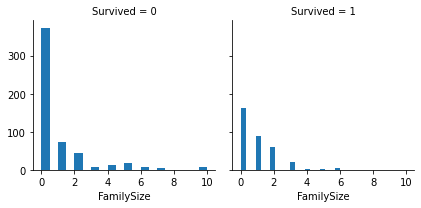

In [45]:
g = sns.FacetGrid(data, col = 'Survived')
g.map(plt.pyplot.hist,'FamilySize', bins = 20)

#### From the hist above, we can conclude that passengers with less than 3 family members are likely to die.
#### Passengers with more than 3 family members have higher probability of survival. 